# Programming assignment 10: Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  PCA Task

Given the data in the matrix X your tasks is to:
* Calculate the covariance matrix $\Sigma$.
* Calculate eigenvalues and eigenvectors of $\Sigma$.
* Plot the original data $X$ and the eigenvectors to a single diagram. What do you observe? Which eigenvector corresponds to the smallest eigenvalue?
* Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace.
* Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.	

### The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

### Task 1: Calculate the covariance matrix $\Sigma$

In [3]:
def get_covariance(X):
    """Calculates the covariance matrix of the input data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
        
    Returns
    -------
    Sigma : array, shape [D, D]
        Covariance matrix
        
    """
    N, D = X.shape
    mean = np.dot(X.T, np.ones((N, 1))) * 1.0/N
    cov = np.dot(X.T, X) * 1.0/N  - np.dot(mean, mean.T)
    return cov

Note: The covariance of the data is equal to the covariance of the centered data

In [4]:
# covariance of data
get_covariance(X)

array([[2.82352941, 2.47058824],
       [2.47058824, 2.82352941]])

In [5]:
# covariance of centered data
get_covariance(X - np.mean(X, axis=0))

array([[2.82352941, 2.47058824],
       [2.47058824, 2.82352941]])

### Task 2: Calculate eigenvalues and eigenvectors of  $\Sigma$.

In [6]:
def get_eigen(S):
    """Calculates the eigenvalues and eigenvectors of the input matrix.
    
    Parameters
    ----------
    S : array, shape [D, D]
        Square symmetric positive definite matrix.
        
    Returns
    -------
    L : array, shape [D]
        Eigenvalues of S
    U : array, shape [D, D]
        Eigenvectors of S
    
    """
    steps = 10
    D = S.shape[0]
    U = np.zeros((D, D))
    L = np.zeros((D,))
    
    # find eigenvectors using Von Mises Power Iteration
    for d in range(D):
        
        # initialize arbitrary normalized vector
        w = np.random.randn(D).reshape(D,1)
        w = w / np.linalg.norm(w)
        for s in range(steps):
            w = np.dot(S, w) / np.linalg.norm(np.dot(S, w))
        U[:, d] = w[:,0]
        
        # find the corresponding eigenvalue 
        v = np.dot(w.T, np.dot(S, w))
        L[d] = v
        
        # deflate the covariance matrix
        S = S - v * np.dot(w, w.T)
        
    return L, U

### Task 3: Plot the original data X and the eigenvectors to a single diagram.

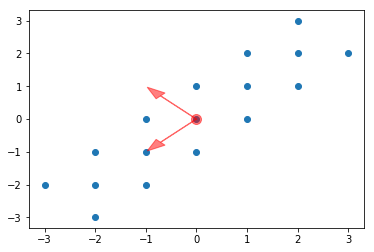

In [7]:
# plot the original data
plt.scatter(X[:, 0], X[:, 1])

# plot the mean of the data
mean_d1, mean_d2 = X.mean(0)
plt.plot(mean_d1, mean_d2, 'o', markersize=10, color='red', alpha=0.5)

# calculate the covariance matrix
Sigma = get_covariance(X)

# calculate the eigenvector and eigenvalues of Sigma
L, U = get_eigen(Sigma)
U = U.T
plt.arrow(mean_d1, mean_d2, U[0, 0], U[0, 1], width=0.01, color='red', alpha=0.5, head_width=0.25)
plt.arrow(mean_d1, mean_d2, U[1, 0], U[1, 1], width=0.01, color='red', alpha=0.5, head_width=0.25);

What do you observe in the above plot? Which eigenvector corresponds to the smallest eigenvalue?

Write your answer here:

[**ANSWER**]

By repeatedly using *Von Mises Power Iteration* we compute the eigenvector of `Sigma` with the k-th greatest absolute value, thus the second eigenvector corresponds to the smallest eigenvalues, which is depicted in the plot by the coordinates `U[1, 0], U[1, 1]`.

### Task 4: Transform the data

Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.

In [19]:
def transform(X, U, L):
    """Transforms the data in the new subspace spanned by the eigenvector corresponding to the largest eigenvalue.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
    L : array, shape [D]
        Eigenvalues of Sigma_X
    U : array, shape [D, D]
        Eigenvectors of Sigma_X
        
    Returns
    -------
    X_t : array, shape [N, 1]
        Transformed data
        
    """
    # get smallest eigenvalue
    wmin_idx = np.argmin(L)
    # define new basis by removing smallest eigenvector
    basis = U[:, wmin_idx]
    # project data on new basis
    X_t = np.dot(X, basis.T)
    return X_t

In [21]:
X_t = transform(X, U.T, L)
X_t, X_t.shape

(array([ 7.07106783e-01,  7.07106782e-01,  7.07106781e-01,  7.07106781e-01,
         7.07106780e-01,  7.07106780e-01,  1.07175935e-09,  5.35879674e-10,
         0.00000000e+00, -5.35879674e-10, -1.07175935e-09, -7.07106780e-01,
        -7.07106780e-01, -7.07106781e-01, -7.07106781e-01, -7.07106782e-01,
        -7.07106783e-01]), (17,))

##  Task SVD

### Task 5: Given the matrix $M$ find its SVD decomposition $M= U \cdot \Sigma \cdot V$ and reduce it to one dimension using the approach described in the lecture.

In [16]:
M = np.array([[1, 2], [6, 3],[0, 2]])

In [17]:
def reduce_to_one_dimension(M):
    """Reduces the input matrix to one dimension using its SVD decomposition.
    
    Parameters
    ----------
    M : array, shape [N, D]
        Input matrix.
        
    Returns
    -------
    M_t: array, shape [N, 1]
        Reduce matrix.
    
    """
    U, S, V = np.linalg.svd(M, full_matrices=False)
    M_t = np.dot(M, V.T)
    return M_t

In [18]:
M_t = reduce_to_one_dimension(M)
M_t, M_t.shape

(array([[-1.90211303,  1.1755705 ],
        [-6.68109819, -0.60243425],
        [-1.05146222,  1.70130162]]), (3, 2))